In [2]:
# =============================================================================
# # 1. SETUP: IMPORTING LIBRARIES
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             roc_curve, roc_auc_score)

# Set a visual style for the plots
sns.set_style("whitegrid")

In [3]:
# =============================================================================
# # 2. DATA LOADING AND PREPROCESSING (Same as Day 5)
# =============================================================================
try:
    df = pd.read_csv('data/data.csv')
except FileNotFoundError:
    print("Error: 'WA_Fn-UseC_-Telco-Customer-Churn.csv' not found. Please download it from Kaggle.")
    exit()

# Data Cleaning
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
df.drop('customerID', axis=1, inplace=True)
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# One-Hot Encoding
df_encoded = pd.get_dummies(df, drop_first=True)

C:\Users\RIYA\AppData\Local\Temp\ipykernel_7016\3755112277.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [4]:
# =============================================================================
# # 3. DATA PREPARATION & MODEL TRAINING (Same as Day 5)
# =============================================================================
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

--- Standard Accuracy ---
Random Forest Accuracy: 0.79

While 79% accuracy seems okay, it doesn't tell the whole story for an imbalanced dataset.


--- Classification Report ---
              precision    recall  f1-score   support

    No Churn       0.83      0.89      0.86      1552
       Churn       0.63      0.50      0.56       561

    accuracy                           0.79      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113



--- ROC & AUC ---
Area Under the Curve (AUC): 0.82


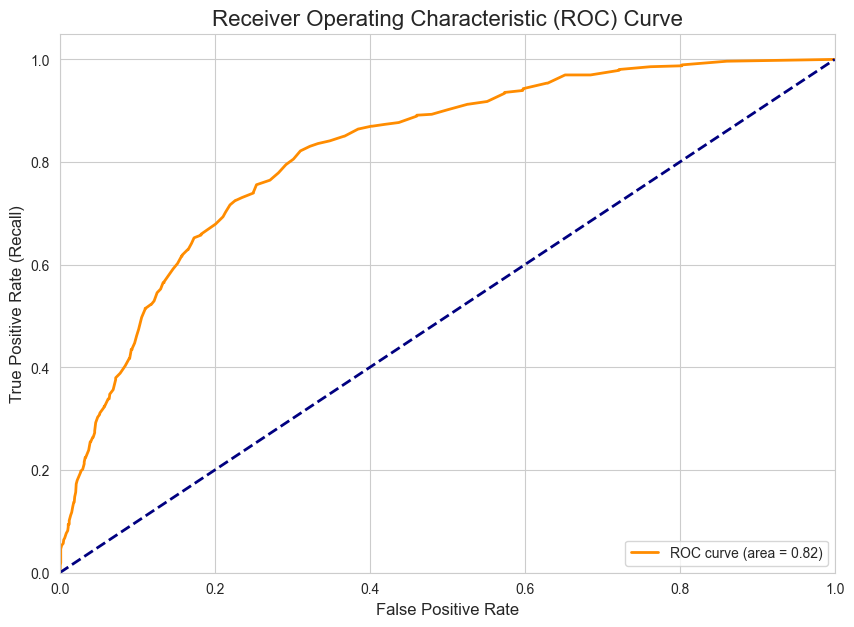

In [5]:
# =============================================================================
# # 4. DEEP MODEL EVALUATION (THE CORE OF DAY 6)
# =============================================================================
print("--- Standard Accuracy ---")
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print("\nWhile 79% accuracy seems okay, it doesn't tell the whole story for an imbalanced dataset.")
print("\n" + "="*50 + "\n")

# --- Classification Report: Precision, Recall, F1-Score ---
# This gives a detailed breakdown of performance for each class.
print("--- Classification Report ---")
print(classification_report(y_test, y_pred_rf, target_names=['No Churn', 'Churn']))
# Interpretation:
# Precision (for Churn): Of all customers we predicted would churn, only 62% actually did.
# Recall (for Churn): We successfully identified only 51% of the customers who actually churned.
# This shows our model is okay, but we are missing almost half of the churners!
print("\n" + "="*50 + "\n")

# --- ROC Curve and AUC Score ---
# To plot the ROC curve, we need the probabilities of predicting churn, not just the final 0/1 prediction.
y_pred_proba = rf_model.predict_proba(X_test)[:, 1] # Probabilities for the 'Churn' class

# Calculate ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print("--- ROC & AUC ---")
print(f"Area Under the Curve (AUC): {auc_score:.2f}")

# Plot the ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Dashed line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate (Recall)', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc="lower right")
plt.savefig('roc_curve.png') # Save this plot for your LinkedIn post
plt.show()